Shivam Yadav (1BI20AI062)<br>
Sanskar Sinha (1BI20AI061)<br>
Project-Credit Card Fraud Detection 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Load and Prepare Data

### Loading the Data

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\creditcard.csv")

### Understanding the Data

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Describing the Data

In [4]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271

# Exploratory Data Analysis

### Imbalance in the data

In [5]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]
outlierFraction=len(fraud)/float(len(valid))
print(outlierFraction)
print("Fraud class: {}".format(len(fraud)))
print("Valid class: {}".format(len(valid)))

0.0017304750013189597
Fraud class: 492
Valid class: 284315


Only 0.17% fraudulent transactions out of all the transactions. The data is highly unbalanced.

### Printing the amount details for Fraudulent Transaction

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

### Printing the amount details for Normal Transaction

In [7]:
print("Amount details of valid transaction")
valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

Class as pie chart:


Text(0, 0.5, '')

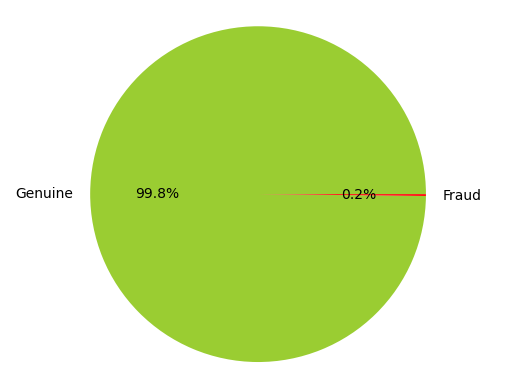

In [8]:
# Check Class variables that has 0 value for Genuine transactions and 1 for Fraud
print("Class as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['Genuine','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

### Plotting the Correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.

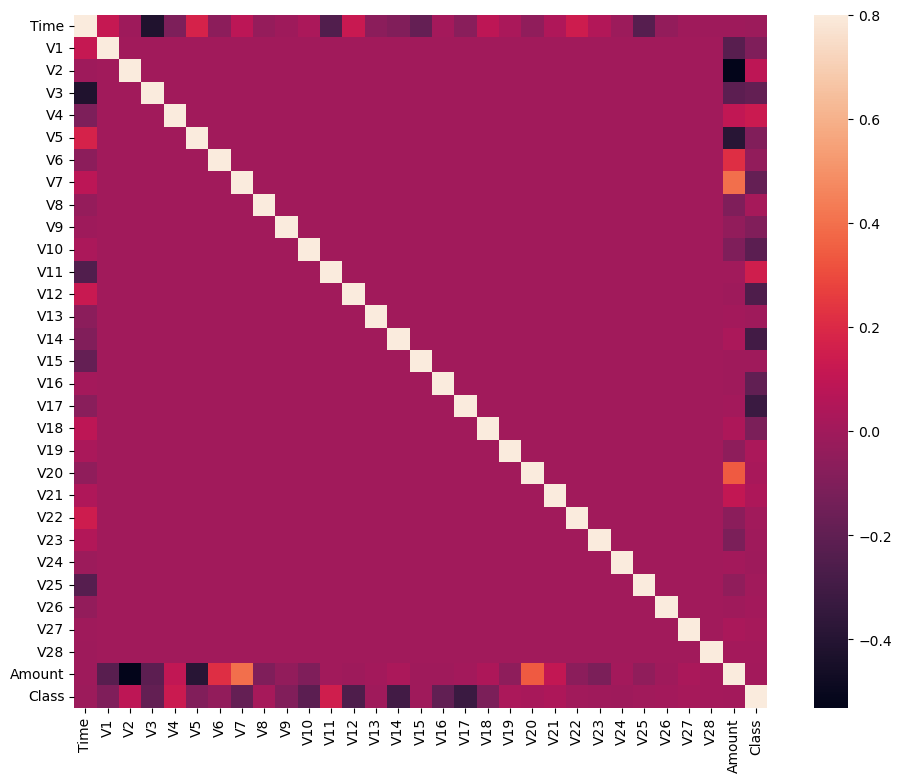

In [9]:
corrmat=data.corr()
fig=plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

### Separating the X and Y values

Dividint the data into inputs parameters and outputs value format

In [10]:
x=data.drop(['Class'],axis=1)
y=data['Class']
print(x.shape)
print(y.shape)
x_data=x.values
y_data=y.values

(284807, 30)
(284807,)


Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

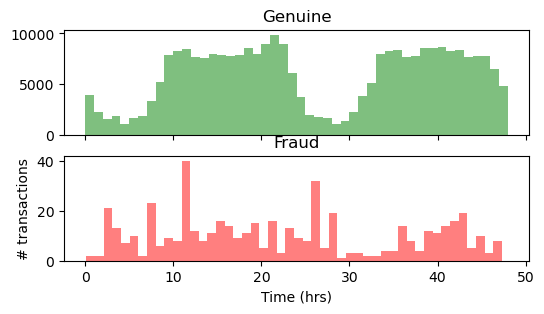

In [11]:
#plot Time to see if there is any trend
print("Time variable")
data["Time_Hr"] = data["Time"]/3600 # convert to hours
print(data["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(data.Time_Hr[data.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(data.Time_Hr[data.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

This "Time" feature shows that rate of transactions is picking up during day time. But number of transactions have almost similar dependence on time of the day for both the classes. So, I believe this feature does not yield any predictive power to distinguish between the two classes. But ofcourse I will later test this assumption. For now, I'll keep this feature in data frame. I will drop "Time" but keep "Time_Hr".

Text(0, 0.5, '# transactions')

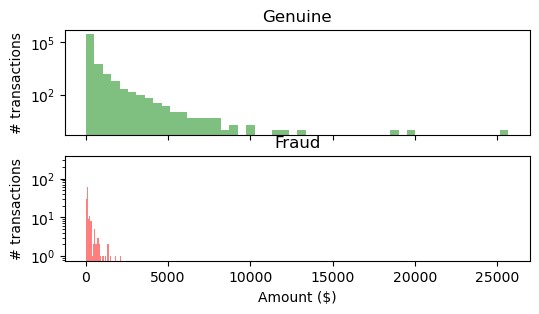

In [12]:
#let us check another feature Amount
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(data.Amount[data.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')


ax4.hist(data.Amount[data.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails

ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

Interesting to note "all transaction amounts > 10K in Genuine Class only". Also this amount feature is not on same scale as principle components. So, I'll standardize the values of the 'Amount' feature using StandardScalar and save in data-frame for later use.

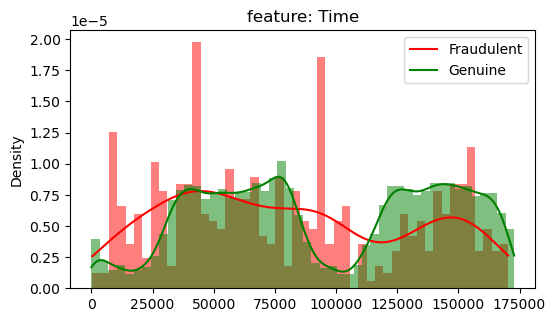

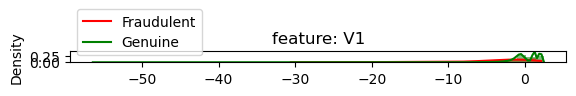

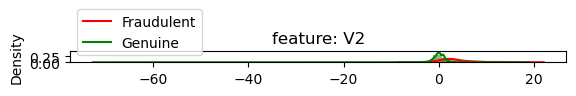

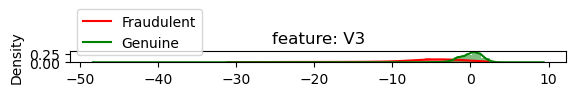

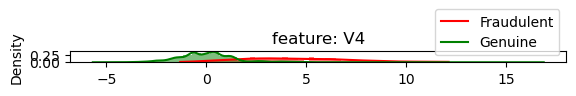

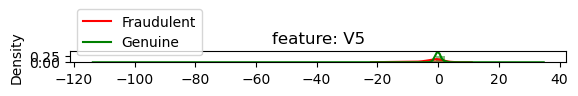

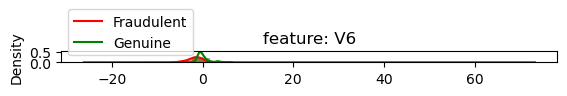

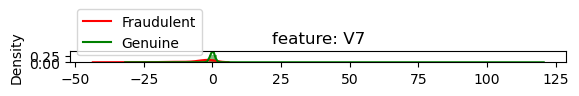

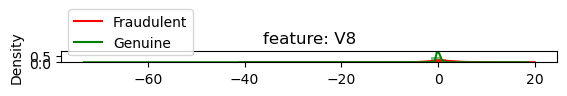

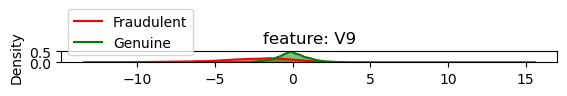

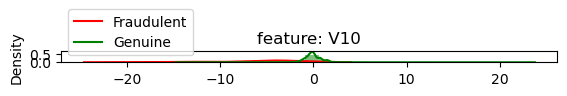

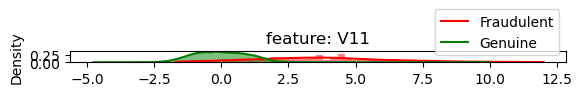

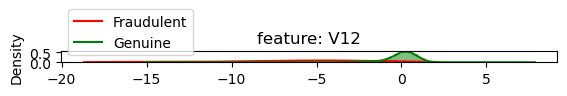

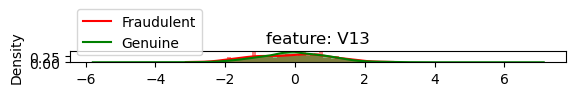

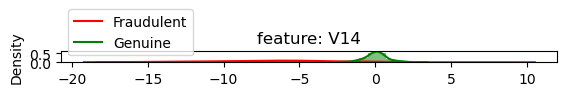

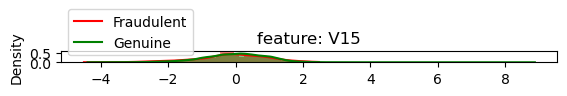

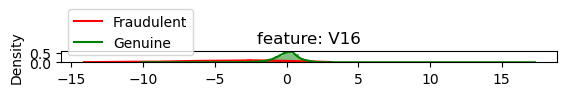

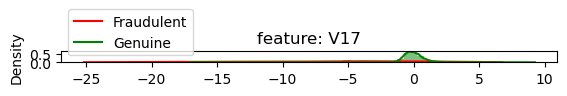

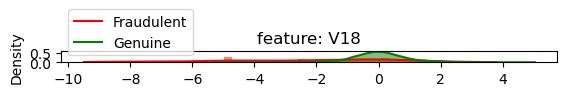

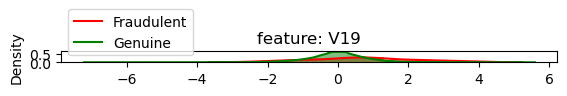

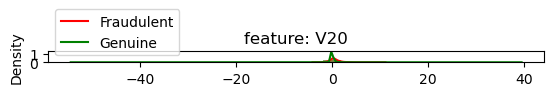

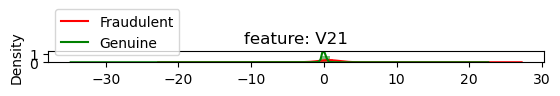

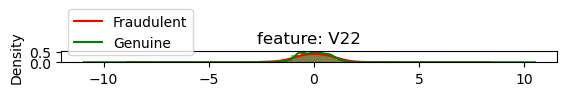

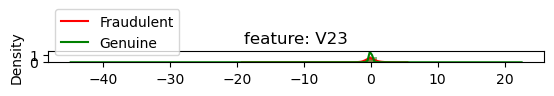

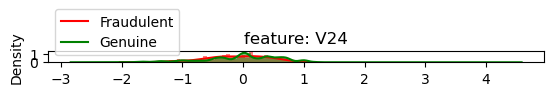

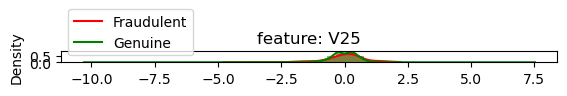

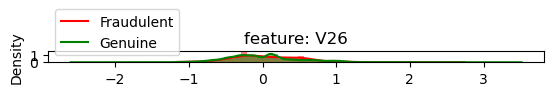

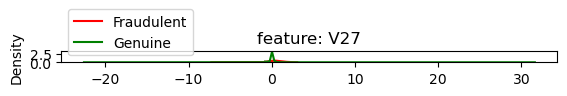

In [13]:
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(data[data.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.histplot(data[col][data.Class == 1], bins=50, color="red", kde=True,stat="density", linewidth=0)
    sns.histplot(data[col][data.Class == 0], bins=50, color='green', kde=True,stat="density", linewidth=0)
    ax5.set_xlabel('')
    plt.legend(["Fraudulent", "Genuine"])
    ax5.set_title('feature: ' + str(col))
    plt.show()

For some of the features, both the classes have similar distribution. So, I don't expect them to contribute towards classifying power of the model. So, it's best to drop them and reduce the model complexity, and hence the chances of overfitting. Ofcourse as with my other assumptions, I will later check the validity of above argument.

# Model Development

### Training and Testing Data Bifurcation

We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model’s performance.

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)

### Building a Random Forest Model using scikit learn

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

# Model Evaluation

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

In [17]:
n_outliers = len(fraud)
n_errors = (y_pred != y_test).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(y_test, y_pred)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_pred)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_pred)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_pred)
print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9996137776061234
The precision is 0.975
The recall is 0.7959183673469388
The F1-Score is 0.8764044943820225
The Matthews correlation coefficient is0.8807418913871203


### Visualising the Confusion Matrix

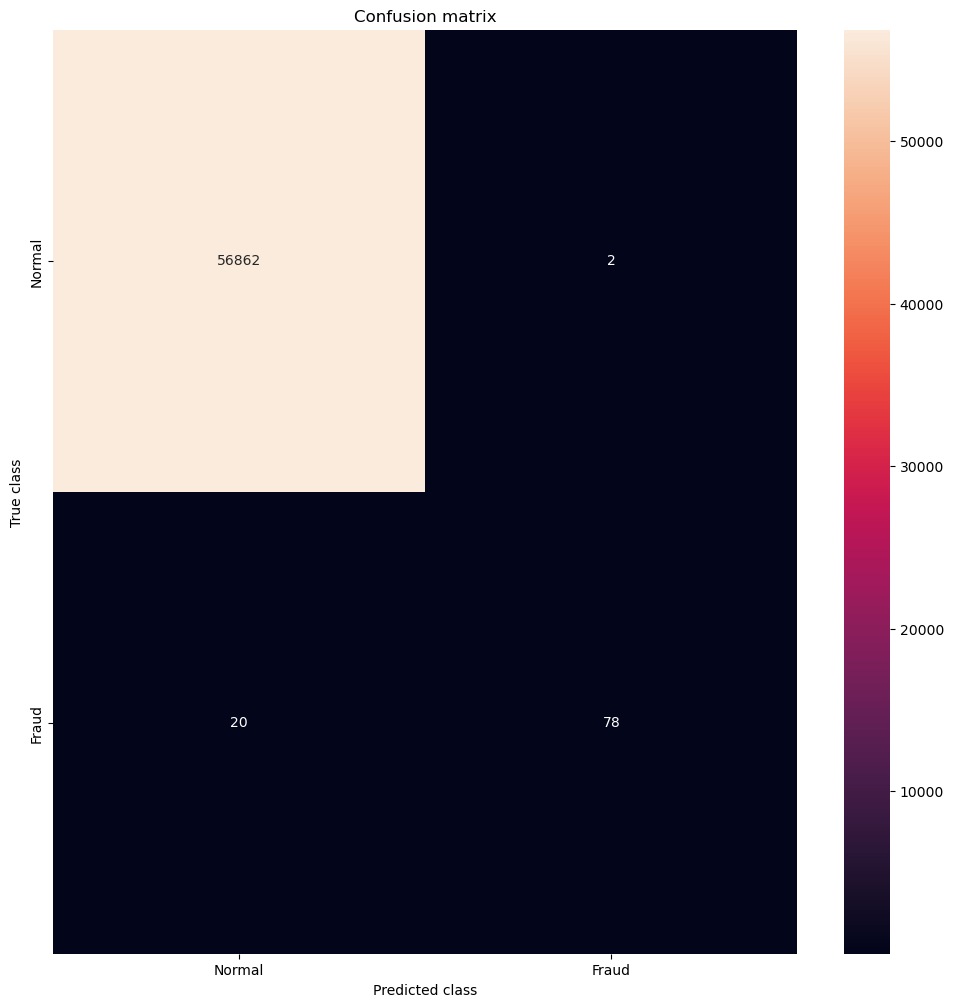

In [18]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Implementing other Algorithms

## 1) Naive Bayes Algorithm

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
yPredNB=model.predict(x_test)

In [20]:
n_outliers = len(fraud)
n_errors = (yPredNB != y_test).sum()
print("The model used is Naive Bayes classifier")
  
acc1 = accuracy_score(y_test, yPredNB)
print("The accuracy is {}".format(acc1))
  
prec1 = precision_score(y_test, yPredNB)
print("The precision is {}".format(prec1))
  
rec1 = recall_score(y_test, yPredNB)
print("The recall is {}".format(rec1))
  
f11 = f1_score(y_test, yPredNB)
print("The F1-Score is {}".format(f11))
  
MCC1 = matthews_corrcoef(y_test, yPredNB)
print("The Matthews correlation coefficient is{}".format(MCC1))

The model used is Naive Bayes classifier
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898
The F1-Score is 0.2375478927203065
The Matthews correlation coefficient is0.3019617859258202


## 2) Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
yPredDC = clf.predict(x_test)

In [22]:
n_outliers = len(fraud)
n_errors = (yPredDC != y_test).sum()
print("The model used is Decision Tree classifier")
  
acc2 = accuracy_score(y_test, yPredDC)
print("The accuracy is {}".format(acc2))
  
prec2 = precision_score(y_test, yPredDC)
print("The precision is {}".format(prec2))
  
rec2 = recall_score(y_test, yPredDC)
print("The recall is {}".format(rec2))
  
f12 = f1_score(y_test, yPredDC)
print("The F1-Score is {}".format(f12))
  
MCC2 = matthews_corrcoef(y_test, yPredDC)
print("The Matthews correlation coefficient is{}".format(MCC2))

The model used is Decision Tree classifier
The accuracy is 0.9991573329588147
The precision is 0.7314814814814815
The recall is 0.8061224489795918
The F1-Score is 0.7669902912621359
The Matthews correlation coefficient is0.7674772757719523


## 3)Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() 
lr.fit(x_train, y_train)
yPredLR=lr.predict(x_test) 

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print("The model used is Linear Regression")

mse = mean_squared_error(y_test, yPredLR)
print("Mean Squared Error:", mse)

r2 = r2_score(y_test, yPredLR)
print("R-squared:", r2)

The model used is Linear Regression
Mean Squared Error: 0.0008301184002984185
R-squared: 0.5166663660896537
